In [45]:
import pandas as pd
import numpy as np
from pandas import DataFrame

import seaborn as sb
#Date time
#dt.date
#dt.day
#dt.week
#dt.time
#dt.day_anme
#df.minute
#df.second

In [4]:
df=pd.read_csv('diminos_data.csv')

In [5]:
df

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056
...,...,...,...
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409378
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.672912
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676238
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810358


In [6]:
df.shape
#no of orders are 1500 in the month of march 2023

(15000, 3)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


In [8]:
#from the data we can find
# *average time to deliver
# *peak hours of orders 
# *peak days of order
# *fastest delivery 
# *slowest delivery

#* Dominos promises that order placed are delivered in 30 min .........Then find the failed intime deliveries.

In [9]:
df['order_placed_at']=pd.to_datetime(df['order_placed_at'])
df['order_delivered_at']=pd.to_datetime(df['order_delivered_at'])

In [22]:
#time of the orders
df['order_placed_at'].dt.time

0        00:00:59
1        00:03:59
2        00:07:22
3        00:07:47
4        00:09:03
           ...   
14995    23:37:05
14996    23:47:38
14997    23:50:16
14998    23:52:44
14999    23:58:20
Name: order_placed_at, Length: 15000, dtype: object

In [21]:
#days of the month 
df['order_placed_at'].dt.day


0         1
1         1
2         1
3         1
4         1
         ..
14995    27
14996    27
14997    27
14998    27
14999    27
Name: order_placed_at, Length: 15000, dtype: int64

In [20]:
df['order_placed_at'].dt.week.value_counts()
#10th week of the 2023 has maximum number of orders
#and 13th week has low number of orders 

C:\Users\krant\AppData\Local\Temp\ipykernel_16312\3945818565.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['order_placed_at'].dt.week.value_counts()


10    3999
12    3935
11    3725
9     2790
13     551
Name: order_placed_at, dtype: int64

In [13]:


#creating of features is called feature engineering
#Wednesday more number of orders are placed and least on the monday

In [35]:

df['duration']=df['order_delivered_at'] - df['order_placed_at']



C:\Users\krant\AppData\Local\Temp\ipykernel_16312\963767981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration']=df['order_delivered_at'] - df['order_placed_at']


In [36]:
#fastest delivery=15 minutes
#slowest delivery = 5 days 1hr 50 minutes
#average delivery time = 20 minutes

#yes dominos promising of 30min delivery is true


df['delivery_minutes']=df['duration'].dt.total_seconds()/60
print('median: ',df['delivery_minutes'].median())
print('mean: ',df['delivery_minutes'].mean())
print('standard deviation: ',df['delivery_minutes'].std())
#clearly there are outliers since there is huge difference between standard deviation and mean

median:  15.763923250000001
mean:  16.992519561709482
standard deviation:  3.3612648586390774


C:\Users\krant\AppData\Local\Temp\ipykernel_16312\1881286109.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['delivery_minutes']=df['duration'].dt.total_seconds()/60


<AxesSubplot:>

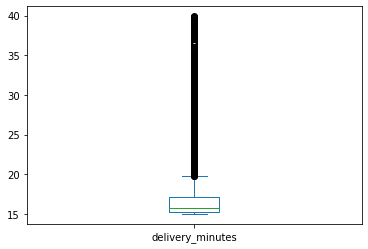

In [37]:
df['delivery_minutes'].plot(kind='box')
#there a are huge delivery times such as 5 days

<AxesSubplot:>

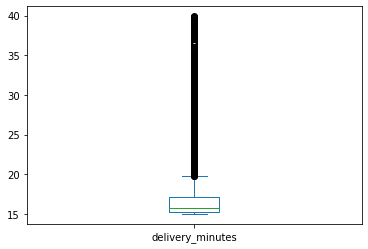

In [38]:
df=df[df['delivery_minutes']<40]
df['delivery_minutes'].plot(kind='box')

In [39]:
df['delivery_minutes'].quantile(0.95)

23.596276583333314

In [40]:
df[df['delivery_minutes']>31].shape

(226, 5)

In [41]:
#total pizzas that needs to be given free =331+226=557
#suppose one pizza is costing 500 INR
free_amt_pizzas=557*500

print('cost_of_pizzas given free :',free_amt_pizzas/100000,'Lakhs')

cost_of_pizzas given free : 2.785 Lakhs
